Datenauswertung: Kickstarter Analyse
=======
----------------

                                                                                                               28.04.2020
                                                                                                               Garrit Wilson
                                                                                                               DSBA.02

# Inhalt


### **1. ETL**


### **2. Data Cleaning**


### **3. EDA**

    3.1 Hauptkategorien
    3.2 gespendeter Betrag
    3.3 Anzahl Unterstützender
    3.3 Zielsetzung
    3.4 Dauer
    3.5 Status
    3.6 Währung
    3.7 Land

### 4. Analyse

    4.1 Anteil erfolgreicher Projekte der einzelnen Hauptkategorien
    4.2 Länder
    4.3 Währung
    4.4 Zielsetzung
    4.5 Dauer

### 5. Visualisierungen

### 6. Zusammenfassung

### 7. Ausreißer

    7.1 IQR - Dataframe
    
    7.2 EDA
    
        7.2.1 gespendeter Betrag
        7.2.2 Zielsetzung
        7.2.3 Dauer
       
    7.3 Analyse

## Vorbereitung

Laden der für die Analyse benötigten libraries

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 1. ETL
----------------------

Änderung der codierung der Daten und einlesen 

In [3]:
ks = pd.read_csv(r'C:\Users\garri\OneDrive\Desktop\DBU\02.DSBA\Studienarbeit\Analyse\input\ks2.csv', encoding= 'latin1', low_memory=False,)

*Quelle: https://www.edureka.co/community/52722/unicodedecodeerror-codec-decode-position-invalid-start-byte

# 2. Data Cleaning
--------------------------

Daten Bereinigung (exkludieren von fehlenden / fehlerhaften Einträgen und Änderung der Datentypen)

In [51]:
ks.head(3)

,name,main_category,currency,deadline,launched,state,backers,country,usd pledged,goal,duration
0,The Songs of Adelaide & Abullah,Publishing,GBP,2015-10-09,2015-08-11 12:12:28,failed,0,GB,0.0,1533.95,58
1,Greeting From Earth: ZGAC Arts Capsule For ET,Film & Video,USD,2017-11-01,2017-09-02 04:43:57,failed,15,US,100.0,30000.00,59
2,Where is Hank?,Film & Video,USD,2013-02-26,2013-01-12 00:20:50,failed,3,US,220.0,45000.00,44


In [5]:
ks.dtypes

ID                    int64
name                 object
category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
pledged             float64
state                object
backers               int64
country              object
usd pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
dtype: object

In [6]:
ks.drop(["ID", "pledged", "category", "goal", "usd_pledged_real"],  axis= "columns", inplace= True)

In [7]:
ks.rename(columns= {"usd_goal_real": "goal"}, inplace= True)

In [8]:
for x in ks[["deadline", "launched"]]:
    ks[x] = ks[x].apply(pd.to_datetime, errors= 'coerce')

ks["duration"] = ks["deadline"].sub(ks["launched"], axis=0)
ks["duration"]= ks["duration"].dt.days

ks.dtypes

name                     object
main_category            object
currency                 object
deadline         datetime64[ns]
launched         datetime64[ns]
state                    object
backers                   int64
country                  object
usd pledged             float64
goal                    float64
duration                  int64
dtype: object

*Quelle: 

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html

https://stackoverflow.com/questions/37840812/pandas-subtracting-two-date-columns-and-the-result-being-an-integer/37848869

https://stackoverflow.com/questions/25646200/python-convert-timedelta-to-int-in-a-dataframe/42247228

In [9]:
ks.head(3)

,name,main_category,currency,deadline,launched,state,backers,country,usd pledged,goal,duration
0,The Songs of Adelaide & Abullah,Publishing,GBP,2015-10-09,2015-08-11 12:12:28,failed,0,GB,0.0,1533.95,58
1,Greeting From Earth: ZGAC Arts Capsule For ET,Film & Video,USD,2017-11-01,2017-09-02 04:43:57,failed,15,US,100.0,30000.00,59
2,Where is Hank?,Film & Video,USD,2013-02-26,2013-01-12 00:20:50,failed,3,US,220.0,45000.00,44
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,USD,2012-04-16,2012-03-17 03:24:11,failed,1,US,1.0,5000.00,29
4,Community Film Project: The Art of Neighborhoo...,Film & Video,USD,2015-08-29,2015-07-04 08:35:03,canceled,14,US,1283.0,19500.00,55


In [10]:
ks.shape

(378661, 11)

In [11]:
ks.dropna(inplace= True)
ks.shape

(374860, 11)

# 3. EDA
-------------------

Explorative Datenanalyse (univariater Überblick über alle Variablen)

### 3.1 Hauptkategorien

Text(0, 0.5, '')

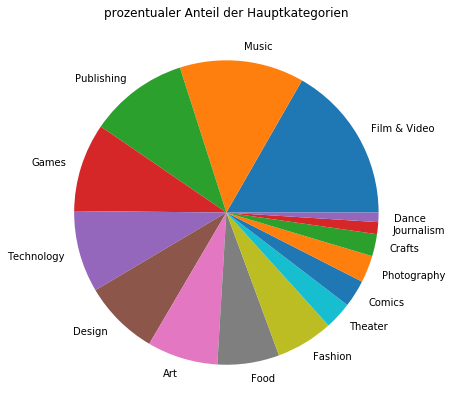

In [53]:
x = ks["main_category"].value_counts().plot.pie(figsize=(10,7))
x.set_title("prozentualer Anteil der Hauptkategorien")
x.set_ylabel("")

### 3.2 gespendeter Betrag

In [13]:
ks["usd pledged"].describe().apply(lambda x: format (x,'f'))

count      374860.000000
mean         7036.802252
std         78640.161667
min             0.000000
25%            16.980000
50%           394.765000
75%          3034.425000
max      20338986.270000
Name: usd pledged, dtype: object

*Quelle: https://stackoverflow.com/questions/40347689/dataframe-describe-suppress-scientific-notation/47207283

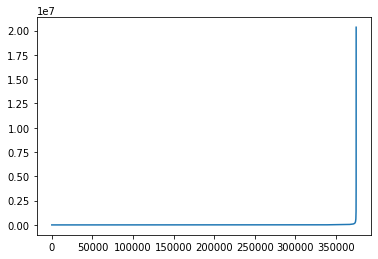

In [14]:
pledged = ks["usd pledged"].sort_values()
pledged = list(pledged)
plt.plot(pledged)

### 3.3 Anzahl Unterstützender

In [15]:
ks["backers"].describe().round(2)

count    374860.00
mean        106.69
std         911.71
min           0.00
25%           2.00
50%          12.00
75%          57.00
max      219382.00
Name: backers, dtype: float64

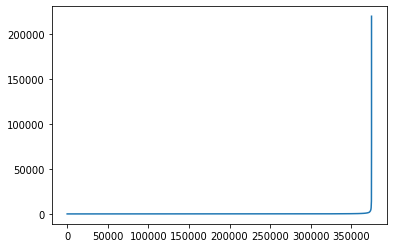

In [16]:
backers = ks["backers"].sort_values()
backers = list(backers)
plt.plot(backers)

### 3.4 Zielsetzung

In [17]:
ks["goal"].describe().apply(lambda x: format(x, 'f'))

count       374860.000000
mean         45863.025972
std        1158767.372734
min              0.010000
25%           2000.000000
50%           5500.000000
75%          16000.000000
max      166361390.710000
Name: goal, dtype: object

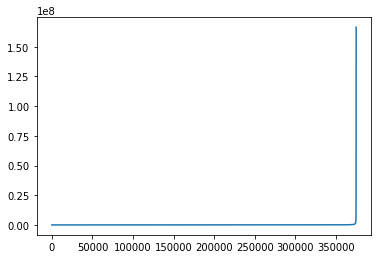

In [18]:
goal = ks["goal"].sort_values()
goal = list(goal)
plt.plot(goal)

### 3.5 Dauer

In [19]:
ks["duration"].describe().round(2)

count    374860.00
mean         33.50
std          66.23
min           0.00
25%          29.00
50%          29.00
75%          36.00
max       16738.00
Name: duration, dtype: float64

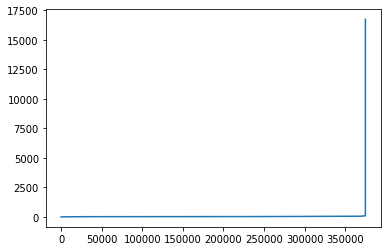

In [20]:
dur = ks["duration"].sort_values()
dur = list(dur)
plt.plot(dur)

### 3.6 Status

In [21]:
ks["state"].value_counts()

failed        197611
successful    133851
canceled       38757
live            2798
suspended       1843
Name: state, dtype: int64

Text(0, 0.5, '')

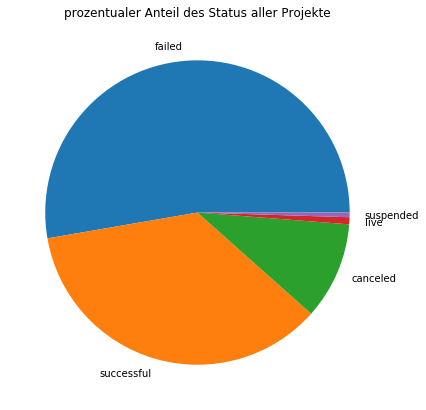

In [54]:
x = ks["state"].value_counts().plot.pie(figsize= (10,7))
x.set_title("prozentualer Anteil des Status aller Projekte")
x.set_ylabel("")

In [23]:
ks.groupby(ks["state"])

### 3.7 Währung

Text(0, 0.5, 'Anzahl der Projekte (ges.)')

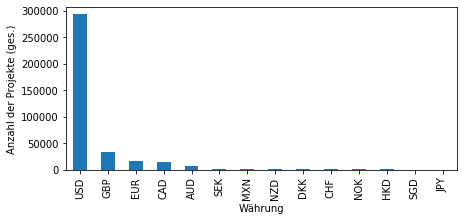

In [55]:
x = ks["currency"].value_counts().plot.bar(figsize= (7,3))
x.set_xlabel("Währung")
x.set_ylabel("Anzahl der Projekte (ges.)")

### 3.8 Länder

Text(0, 0.5, 'Anzahl der Projekte (ges.)')

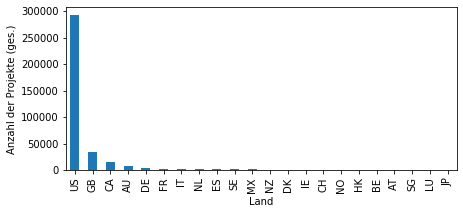

In [56]:
x = ks["country"].value_counts().plot.bar(figsize= (7,3))
x.set_xlabel("Land")
x.set_ylabel("Anzahl der Projekte (ges.)")

# 4. Analyse
-------------------------

Analyse des Zusammenhangs verschiedener Merkmale und der verschiedenen Merkmalsausprägungen

### 4.1 Anteil erfolgreicher Projekte der verschiedenen Hauptkategorien

In [26]:
main_cat = pd.crosstab(ks["main_category"], ks["state"])
main_cat = main_cat.drop(["suspended", "live", "canceled"], axis= 1)
main_cat = main_cat.sort_values(by= 'successful', ascending = False)
main_cat.rename(columns= {"successful": "success", "failed": "failure"}, inplace= True)
main_cat

main_cat_norm = pd.crosstab(ks["main_category"], ks["state"], normalize= "index").round(4)*(100)
main_cat_norm =  main_cat_norm.drop(["suspended", "live", "canceled"], axis= 1)
main_cat_norm = main_cat_norm.sort_values(by= 'successful', ascending = False)
main_cat_norm2 = main_cat_norm.applymap(lambda x: "%.2f %%" % (x))
main_cat_norm2

success_table = pd.concat([main_cat, main_cat_norm2], axis= 1, sort= False)
success_table = success_table.sort_values(by= "successful", ascending= False)

success_table

state,failure,success,failed,successful
Dance,1235,2338,32.78 %,62.07 %
Theater,3708,6534,33.98 %,59.88 %
Comics,4036,5842,37.30 %,54.00 %
Music,21696,24105,43.80 %,48.67 %
Art,14130,11510,50.19 %,40.89 %
Film & Video,32891,23612,52.46 %,37.66 %
Games,16002,12518,45.43 %,35.54 %
Design,14814,10549,49.27 %,35.09 %
Publishing,23113,12300,58.69 %,31.23 %
Photography,6384,3305,59.23 %,30.66 %


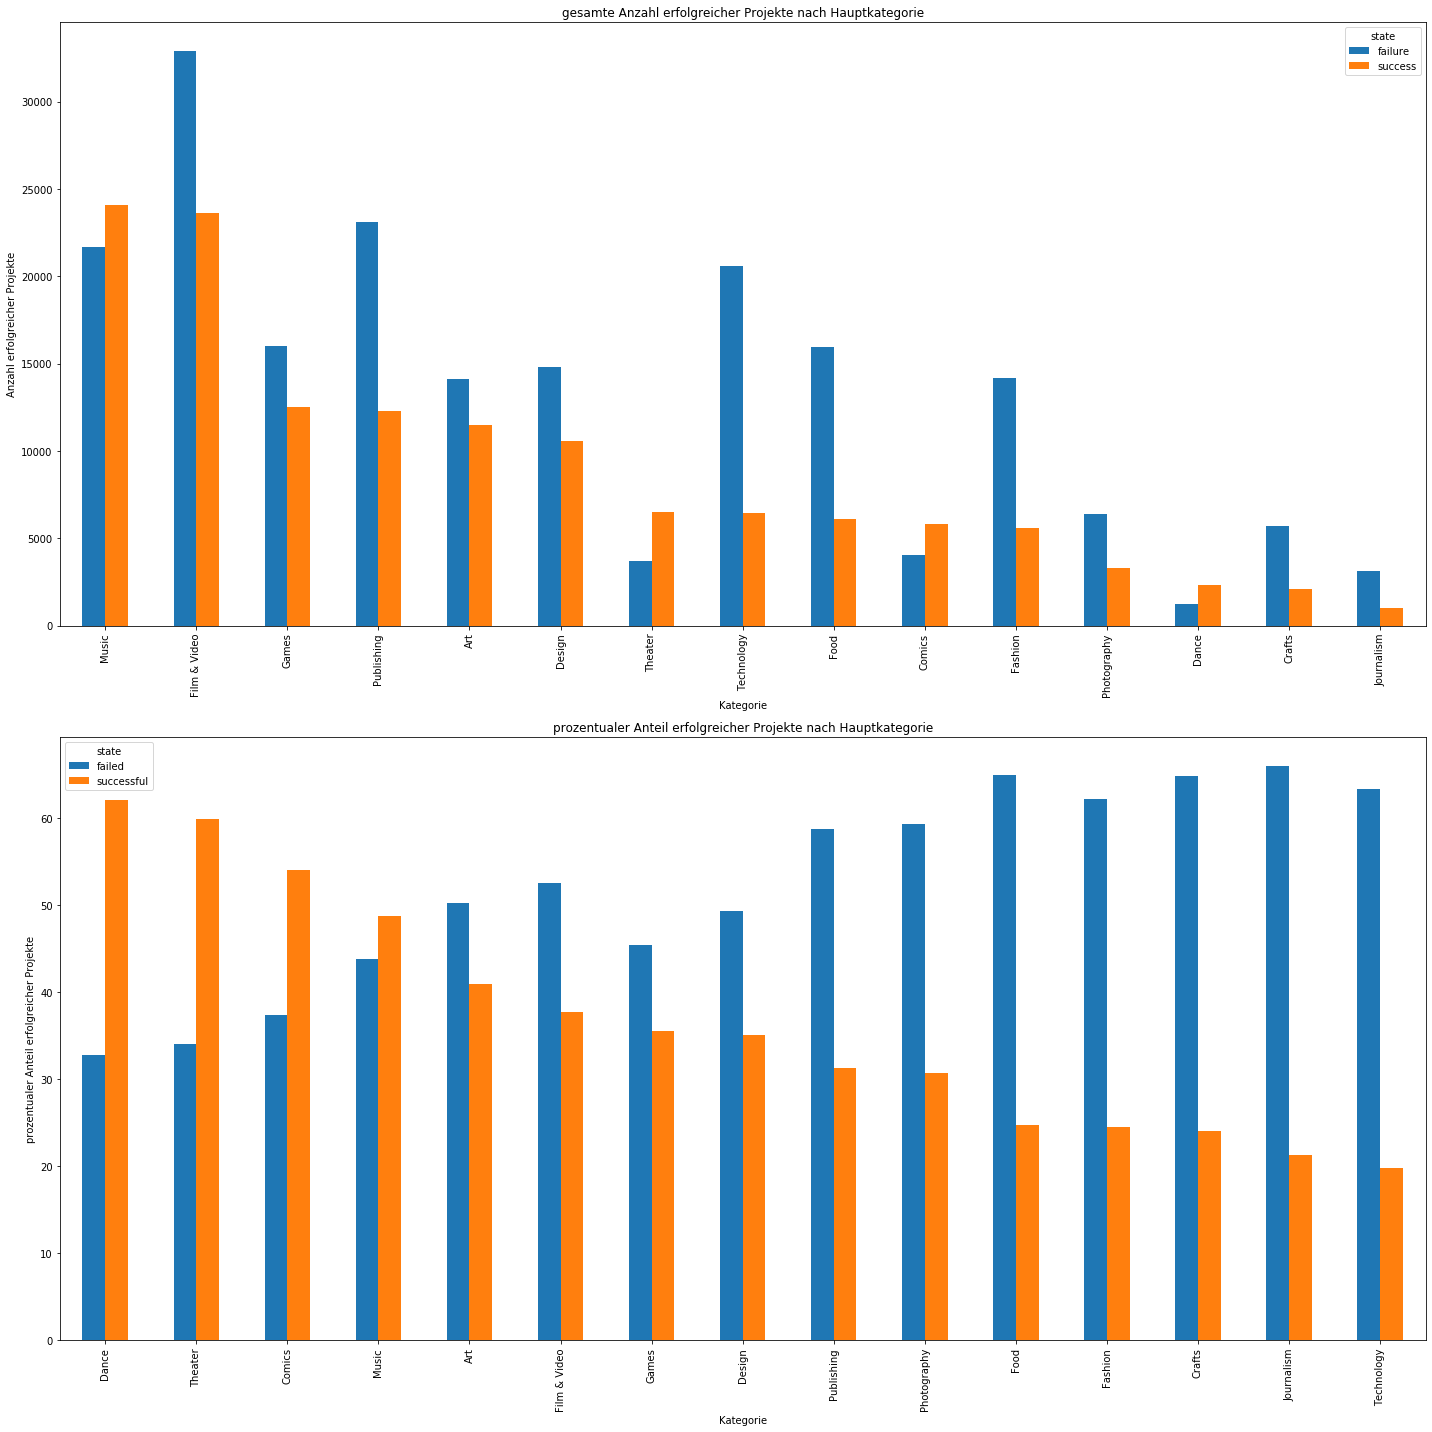

In [27]:
fig, ax = plt.subplots(2, figsize=(20, 20))

main_cat.plot.bar(ax=ax[0])
ax[0].set_title("gesamte Anzahl erfolgreicher Projekte nach Hauptkategorie")
ax[0].set_ylabel("Anzahl erfolgreicher Projekte")
ax[0].set_xlabel("Kategorie")

main_cat_norm.plot.bar(ax=ax[1])
ax[1].set_title("prozentualer Anteil erfolgreicher Projekte nach Hauptkategorie")
ax[1].set_ylabel("prozentualer Anteil erfolgreicher Projekte")
ax[1].set_xlabel("Kategorie")

fig.tight_layout()

### 4.2 Länder

Unterschiede in Erfolgschancen in verschiedenen Ländern

Text(0.5, 0, 'Land')

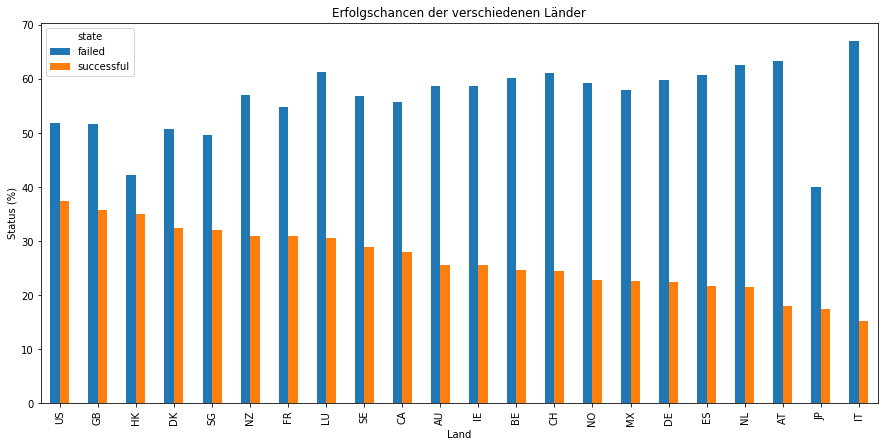

In [28]:
country = pd.crosstab(ks["country"], ks["state"], normalize= "index").round(4)*100
country = country.drop(["suspended", "live", "canceled"], axis= 1)
country = country.sort_values(by= "successful", ascending= False)

x = country.plot.bar(figsize= (15,7))
x.set_title("Erfolgschancen der verschiedenen Länder")
x.set_ylabel("Status (%)")
x.set_xlabel("Land")

### 4.3 Währung

Unterschiede in Erfolgschancen von Projekten mit verschiedenen Währungen

Text(0.5, 0, 'Währung')

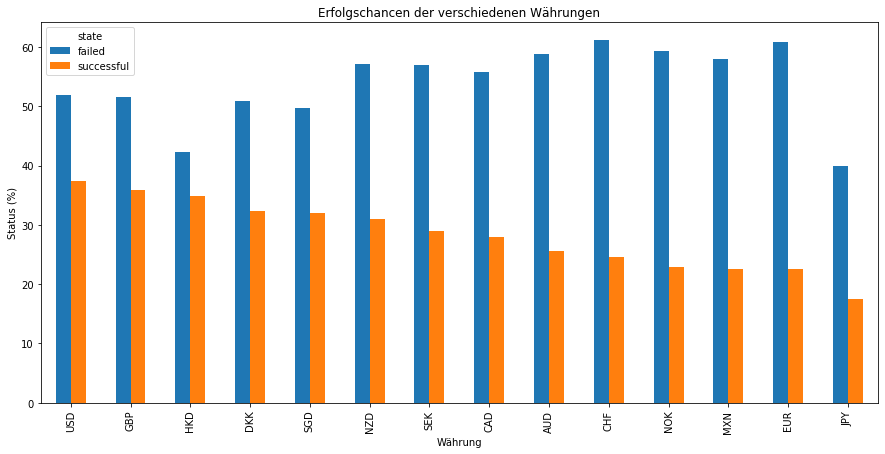

In [29]:
currency = pd.crosstab(ks["currency"], ks["state"], normalize= "index").round(4)*100
currency = currency.drop(["suspended", "live", "canceled"], axis= 1)
currency = currency.sort_values(by= "successful", ascending= False)

x = currency.plot.bar(figsize= (15,7))
x.set_title("Erfolgschancen der verschiedenen Währungen")
x.set_ylabel("Status (%)")
x.set_xlabel("Währung")

### 4.4 Zielsetzung

Zusammenhang zwischen der Zielsetzung und dem gespendeten Betrag einzelner Projekte

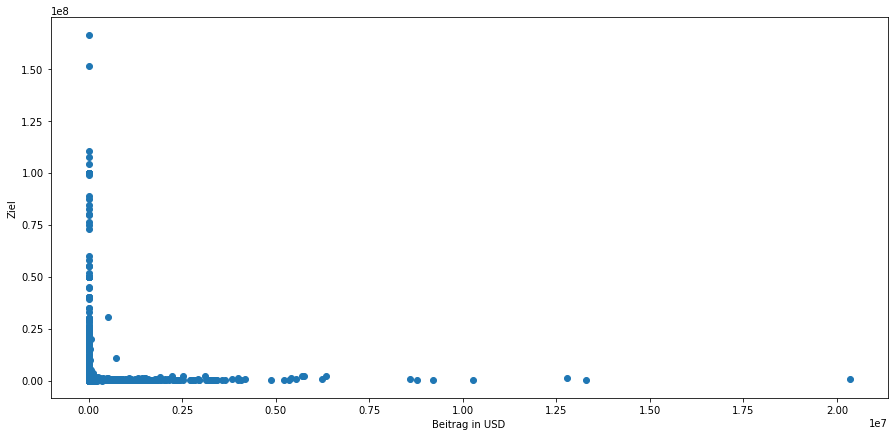

In [30]:
fig, ax = plt.subplots(figsize=(15,7))
ax.scatter(ks["usd pledged"], ks["goal"])
ax.set_xlabel('Beitrag in USD')
ax.set_ylabel('Ziel')
plt.show()

### 4.5 Dauer

Zusammenhang zwischen der Dauer eines Projekts und dem gespendeten Betrag

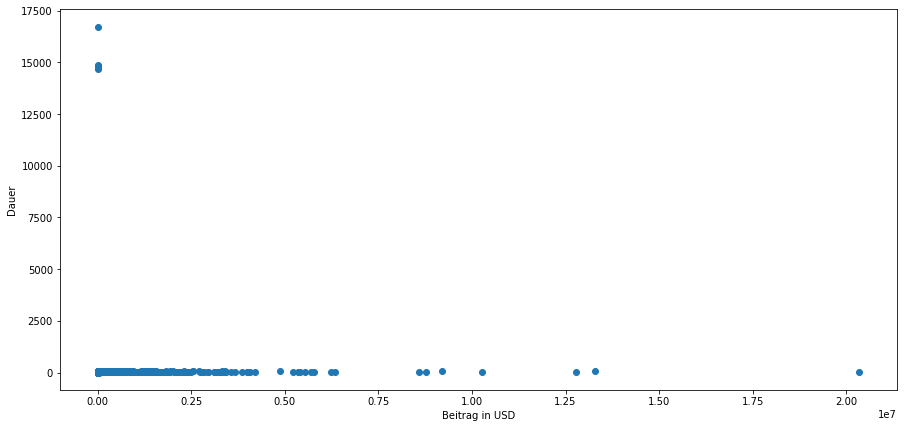

In [31]:
fig, ax = plt.subplots(figsize=(15,7))
ax.scatter(ks["usd pledged"], ks["duration"])
ax.set_xlabel('Beitrag in USD')
ax.set_ylabel('Dauer')
plt.show()

# 5. Visualisierungen
----------------------------------

*Quelle für diese Sektion:

https://seaborn.pydata.org/api.html

In [32]:
betrag = ks.groupby(ks["main_category"]).apply(lambda x: x["usd pledged"].sum()).round(2)
backers = ks.groupby(ks["main_category"]).apply(lambda x: x["backers"].sum())
erfolg = pd.crosstab(ks["main_category"], ks["state"], normalize= "index").round(4)*(100)
erfolg =  erfolg.drop(["suspended", "live", "canceled", "failed"], axis= 1)

df = pd.concat([betrag, backers, erfolg], axis=1, sort= False)
df.reset_index(inplace= True)

df.rename(columns={0: 'Beitrag in USD', 
                   1: 'Anzahl Unterstützender',
                   'successful': '% - erfolgreicher Projekte',
                   'main_category': 'Hauptkategorie'}, inplace= True)

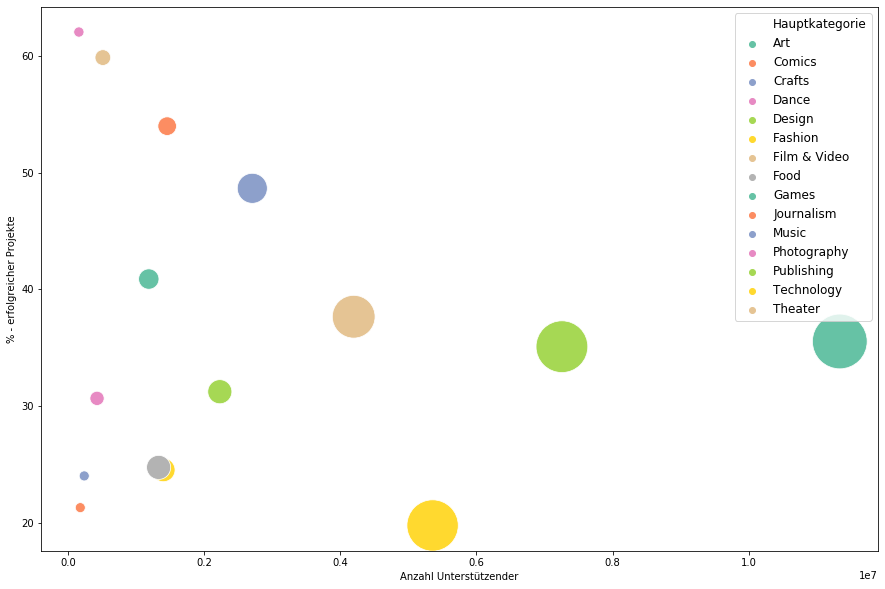

In [33]:
plt.figure(figsize=(15, 10))
ax = sns.scatterplot(x="Anzahl Unterstützender",
                     y="% - erfolgreicher Projekte",
                     size="Beitrag in USD",
                     hue="Hauptkategorie",
                     palette= "Set2",
                     sizes= (100, 3000), 
                     legend= "brief",
                     data=df)

h,l = ax.get_legend_handles_labels()

col_lgd = plt.legend(h[:30], l[:16], loc='upper right', prop={'size': 12})

Eine Visualisierung der Hauptkategorien, anhand verschiedener Merkmale:
* der prozentuale Anteil erfolgreicher Projekte auf der y - Achse
* die Anzahl der Unterstützenden auf der x - Achse
* das Spendenvolumen der Kategorie anhand der größe der Blase

*Quelle: 

https://seaborn.pydata.org/generated/seaborn.scatterplot.html#seaborn.scatterplot

https://thispointer.com/pandas-convert-dataframe-index-into-column-using-dataframe-reset_index-in-python/

https://stackoverflow.com/questions/53437462/how-do-i-remove-an-attribute-from-the-legend-of-a-scatter-plot

-------------------

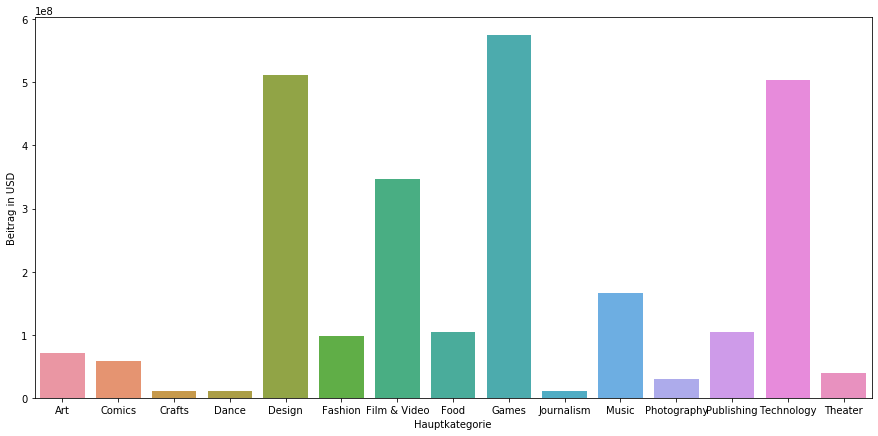

In [34]:
plt.figure(figsize= (15, 7))
ax = sns.barplot(x="Hauptkategorie", y="Beitrag in USD", data=df)

Eine Visualisierung der gesammelten Spendenvolumen der einzelnen Kategorien

-------------

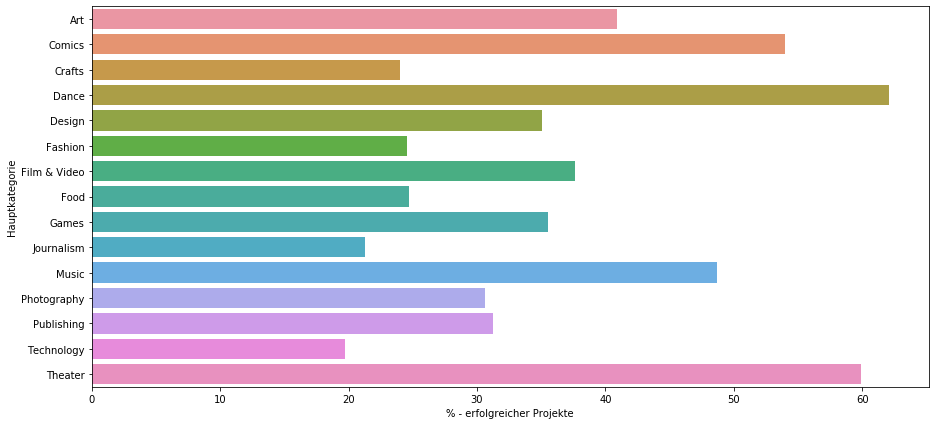

In [35]:
plt.figure(figsize= (15, 7))
ax = sns.barplot(x= "% - erfolgreicher Projekte", y= "Hauptkategorie", data= df)

Eine Visualisierung der Erfolgschancen innerhalb der einzelnen Kategorien

------------------

[Text(0, 0.5, 'Beitrag in USD'), Text(0.5, 0, 'Anzahl Unterstützender')]

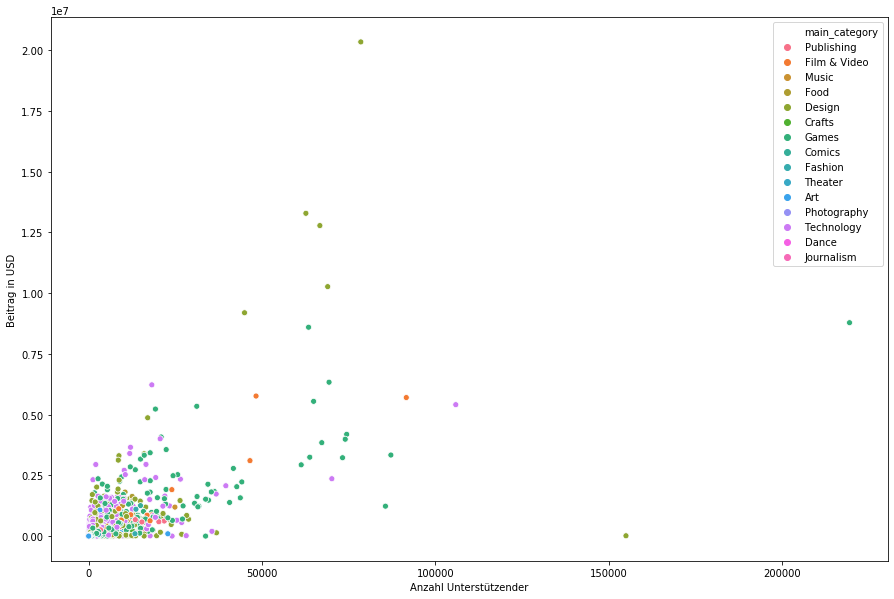

In [36]:
plt.figure(figsize= (15,10))
ax = sns.scatterplot(x="backers", y="usd pledged", hue="main_category", data=ks)
ax.set(xlabel='Anzahl Unterstützender', ylabel='Beitrag in USD')

Eine Visualisierung des Zusammenhangs zwischen der Anzahl Unterstützender und dem gespendeten Beitrag in USD

# 6. Zusammenfassung
-------------------------------------------

Eine Zusammenfassung der wichtigsten Werte zum Vergleich der Hauptkategorien:

* Der prozentuale Anteil erfolgreicher Projekte
* Die Anzahl erfolgreicher Projekte
* Der durchschnittliche, gespendete Beitrag für Projekte 
* Der Median der gespendeten Beträge (50% der Spendenbeträge liegen darüber, 50% darunter)
* Der prozentuale Anteil des Spendenvolumns am Gesamtvolumen aller gespendeten Gelder
* Der gesamte Betrag gespendeter Gelder der Kategorie
* Die gesamte Anzahl von Projekten der Kategorie

In [57]:
erfolg = pd.crosstab(ks["main_category"], ks["state"], normalize= "index").round(4)*(100)
erfolg = erfolg.drop(["suspended", "live", "canceled", "failed"], axis= 1)
erfolg2 = pd.crosstab(ks["main_category"], ks["state"])
erfolg2.rename(columns= {"successful": "success"}, inplace= True)
erfolg2 = erfolg2.drop(["suspended", "live", "canceled", "failed"], axis= 1)
durchschnitt = ks.groupby(ks["main_category"]).apply(lambda x: x["usd pledged"].mean())
perc_total = ks.groupby(ks["main_category"]).apply(lambda x: x["usd pledged"].sum() / ks["usd pledged"].sum()).round(4)*100
median = ks.groupby(ks["main_category"]).apply(lambda x: x["usd pledged"].median())
Projekt_Anzahl = ks["main_category"].value_counts()
Beitrag_ges = ks.groupby(ks["main_category"]).apply(lambda x: x["usd pledged"].sum())

tabelle = pd.concat([erfolg, erfolg2, durchschnitt, median, perc_total, Beitrag_ges, Projekt_Anzahl], axis= 1, sort= False)
tabelle = tabelle.rename(columns= {'successful': '% - erfolgreiche Projekte', 
                                   'success': 'Anzahl erfolgreicher Projekte',
                                   0: 'gespendeter Beitrag (Durchschnitt)',
                                   2: 'gespendeter Beitrag (% - aller Spenden)',
                                   1: 'gespendeter Beitrag (Median)',
                                   'main_category': 'Anzahl der Projekte',
                                   3 : 'gespendeter Beitrag (gesamt)'})

tabelle = tabelle.rename_axis("Hauptkategorie", axis= "index")

tabelle = tabelle.sort_values(by= "% - erfolgreiche Projekte", ascending= False, axis=0)

tabelle = (tabelle.style
           .format({"gespendeter Beitrag (% - aller Spenden)": "%{:20,.2f}", 
                          "gespendeter Beitrag (Durchschnitt)": "${:20,.0f}", 
                          "% - erfolgreiche Projekte": "%{:20,.0f}",
                          "gespendeter Beitrag (Median)": "${:20,.0f}",
                          "gespendeter Beitrag (gesamt)": "${:20,.2f}"})
            .highlight_max(color='lightgreen')\
            .highlight_min(color='#cd4f39'))

#tabelle


-------------



**(Die Tabelle war nicht zufriedenstellend im PDF Format zu exportieren. Sie ist in der Dokumentation in Sektion 4 enthalten)**



------------


*Quelle:

https://towardsdatascience.com/style-pandas-dataframe-like-a-master-6b02bf6468b0

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename_axis.html

# 7. Ausreißer
-------------------------

Separate Analyse des Datensatzes nach aussortieren von "Ausreißern" (Werte welche stark vom Durchschnitt abweichen)

### 7.1 IQR Dataframe

In [38]:
first_quartile_usd = ks["usd pledged"].describe()['25%']
third_quartile_usd = ks["usd pledged"].describe()['75%']
iqr = third_quartile_usd - first_quartile_usd

first_quartile_du = ks["duration"].describe()['25%']
third_quartile_du = ks["duration"].describe()['75%']
iqr2 = third_quartile_du - first_quartile_du

first_quartile_g = ks["goal"].describe()['25%']
third_quartile_g = ks["goal"].describe()['75%']
iqr3 = third_quartile_g - first_quartile_g

ks_iqr = ks[(ks["usd pledged"] > first_quartile_usd) & (ks["usd pledged"] < third_quartile_usd)]
ks_iqr = ks[(ks["duration"] > first_quartile_du) & (ks["duration"] < third_quartile_du)]
ks_iqr = ks[(ks["goal"] > first_quartile_g) & (ks["goal"] < third_quartile_g)]

*Quelle: https://github.com/rileypredum/Kickstarter-Campaign-Success-Prediction/blob/master/Kickstarter%20Campaign%20Success%20Prediction.pdf

In [39]:
ks_iqr.shape

(183165, 11)

### 7.2 EDA

#### 7.2.1 gespendeter Beitrag

In [40]:
ks["usd pledged"].describe().round(2)

count      374860.00
mean         7036.80
std         78640.16
min             0.00
25%            16.98
50%           394.76
75%          3034.42
max      20338986.27
Name: usd pledged, dtype: float64

In [41]:
ks_iqr["usd pledged"].describe().round(2)

count     183165.00
mean        4098.42
std        26878.61
min            0.00
25%           25.09
50%          564.00
75%         4268.00
max      8782571.99
Name: usd pledged, dtype: float64

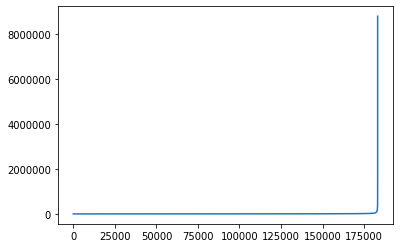

In [42]:
usd = ks_iqr["usd pledged"].sort_values()
usd = list(usd)
plt.plot(usd)

#### 7.2.2 Zielsetzung

In [43]:
ks["goal"].describe().round(2)

count    3.748600e+05
mean     4.586303e+04
std      1.158767e+06
min      1.000000e-02
25%      2.000000e+03
50%      5.500000e+03
75%      1.600000e+04
max      1.663614e+08
Name: goal, dtype: float64

In [44]:
ks_iqr["goal"].describe().round(2)

count    183165.00
mean       6930.07
std        3777.09
min        2000.05
25%        3828.19
50%        5609.97
75%       10000.00
max       15999.00
Name: goal, dtype: float64

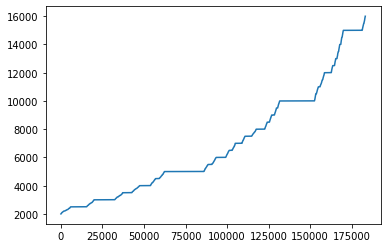

In [45]:
goal = ks_iqr["goal"].sort_values()
goal = list(goal)
plt.plot(goal)

#### 7.2.3 Dauer

In [46]:
ks["duration"].describe().round(2)

count    374860.00
mean         33.50
std          66.23
min           0.00
25%          29.00
50%          29.00
75%          36.00
max       16738.00
Name: duration, dtype: float64

In [47]:
ks_iqr["duration"].describe().round(2)

count    183165.00
mean         33.89
std          70.13
min           0.00
25%          29.00
50%          29.00
75%          36.00
max       14866.00
Name: duration, dtype: float64

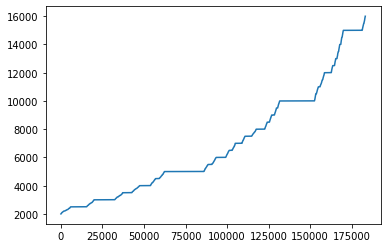

In [48]:
duration = ks_iqr["duration"].sort_values()
duration = list(goal)
plt.plot(duration)

### 7.3 Analyse

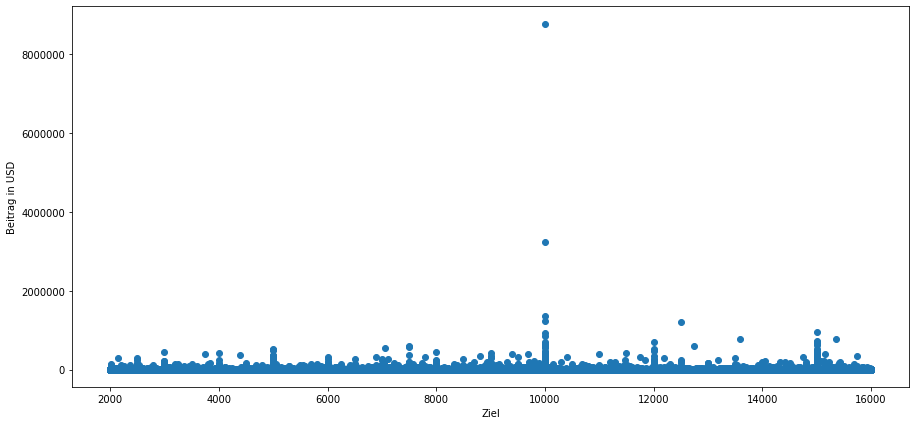

In [49]:
fig, ax = plt.subplots(figsize=(15,7))
ax.scatter(ks_iqr["goal"], ks_iqr["usd pledged"])
ax.set_xlabel('Ziel')
ax.set_ylabel('Beitrag in USD')
plt.show()

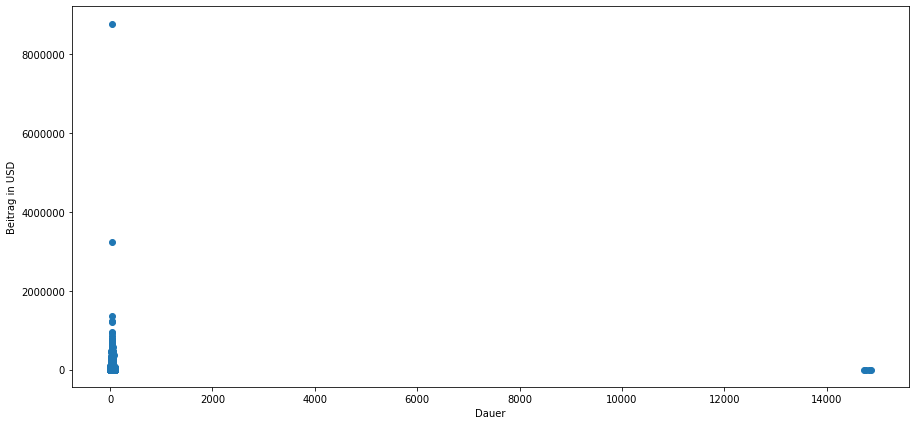

In [50]:
fig, ax = plt.subplots(figsize=(15,7))
ax.scatter(ks_iqr["duration"], ks_iqr["usd pledged"])
ax.set_xlabel('Dauer')
ax.set_ylabel('Beitrag in USD')
plt.show()